<a href="https://colab.research.google.com/github/shudhatma1995/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [9]:
import torch

In [77]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [81]:

for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1


In [82]:
N[0][0]

tensor([   0, 4410, 1306, 1542, 1690, 1532,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [83]:
p = N[0, 0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [86]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [87]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([19, 18, 14, 20,  5,  3, 20, 15, 20, 11, 10, 10, 14, 19, 12,  5, 13, 14,
         1, 11, 18, 11, 22, 10, 10, 14,  1, 11, 13,  1,  4,  4, 13, 19, 18, 10,
        18, 19,  8,  1, 13, 19, 13,  2, 19, 19,  4, 18, 18, 10, 21,  5,  1,  2,
         8, 11, 10,  2,  8, 12,  1, 19, 19, 11,  4, 11,  5,  1,  9,  2, 11, 19,
         2, 12, 19, 10,  1, 11, 12,  1,  1,  1, 18, 26,  3, 12,  1,  2,  1, 11,
        20, 10,  2, 20,  9, 18, 12, 10, 14, 12])

In [67]:
p.shape

torch.Size([27])

In [90]:
N.shape

torch.Size([27, 27, 27])

In [91]:
N.sum(2, keepdim=True).shape

torch.Size([27, 27, 1])

In [ ]:
# 27, 27
# 27,  1

In [70]:
N.sum(2).shape

torch.Size([27, 27])

In [92]:
P = (N+1).float()
P /= P.sum(2, keepdims=True)

In [93]:
P[0][0]

tensor([3.1191e-05, 1.3758e-01, 4.0766e-02, 4.8127e-02, 5.2743e-02, 4.7815e-02,
        1.3038e-02, 2.0898e-02, 2.7292e-02, 1.8465e-02, 7.5575e-02, 9.2449e-02,
        4.9063e-02, 7.9193e-02, 3.5776e-02, 1.2320e-02, 1.6094e-02, 2.9007e-03,
        5.1152e-02, 6.4128e-02, 4.0828e-02, 2.4641e-03, 1.1759e-02, 9.6067e-03,
        4.2107e-03, 1.6718e-02, 2.9007e-02])

In [ ]:
for i in range(0, 27):
  for j in range(0, 27):
    print(P[i, j].sum())

In [95]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix1 = 0
  ix2 = 0
  while True:
    p = P[ix1, ix2]
    temp = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[temp])
    if temp == 0:
      break
    ix1 = ix2
    ix2 = temp
  print(''.join(out))

junide.
jakasid.
prelay.
adin.
kairritoper.


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [97]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ["andrejq"]:
  chs = ['.'] + ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1, ix2, ix3]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-504651.0938)
nll=tensor(504651.0938)
2.211965560913086


In [ ]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([5, 27])

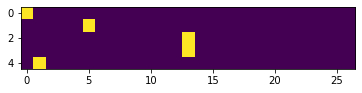

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype

torch.float32

In [ ]:
W = torch.randn((27, 1))
xenc @ W

tensor([[-0.2003, -2.3711, -0.9466,  0.5369, -0.0949, -1.7872, -0.9038,  0.8194,
          0.6926,  0.0114, -1.5301,  0.6077, -1.2056,  1.8605, -1.3012, -0.0301,
         -2.1611, -0.0538, -0.0133, -0.3629,  0.5254, -0.0080,  1.1602,  1.9851,
          0.4976,  0.7351, -0.6373],
        [-0.4422,  0.5024,  1.3514, -0.4085, -0.7854, -1.2568, -0.4558,  0.1466,
         -0.4460,  1.2748, -0.6367,  0.6403, -0.5617, -0.3060,  1.6771, -1.4814,
         -2.7395,  0.3876,  0.3970,  1.5577, -0.1995, -0.1397, -1.3045,  0.4294,
          1.2557,  0.8007,  0.5450],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160,
         -2.2721,  0.9713, -1.0734,  0.3115, -0.2506,  0.0757,  0.9332,  1.6536,
          1.2306,  0.1231, -0.2530],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160

In [ ]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
         0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
         0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132],
        [0.0154, 0.0397, 0.0928, 0.0160, 0.0110, 0.0068, 0.0152, 0.0278, 0.0154,
         0.0860, 0.0127, 0.0456, 0.0137, 0.0177, 0.1286, 0.0055, 0.0016, 0.0354,
         0.0357, 0.1141, 0.0197, 0.0209, 0.0065, 0.0369, 0.0844, 0.0535, 0.0414],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0289, 0.0077,

In [ ]:
probs[0]

tensor([0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
        0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
        0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132])

In [ ]:
probs[0].shape

torch.Size([27])

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [ ]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

3.6891887187957764


In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(1):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

2.481828451156616


In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
